# BINOMIAL OPTION MODEL

#### Youtube - Kevin Mooney - https://www.youtube.com/watch?v=d7wa16RNRCI


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
from scipy.stats import bernoulli

%matplotlib inline

In [4]:
# some stock price

S0 = 100
t = 1     # time to expiration
u = 1.05  #(p(price rises))  5%
d = 1/u   #? so drop in price less likely?    prob of stock doubling same as prob stock being cut in half

p = 0.6  # prob price rising

S_u = u*S0
S_d = d*S0

print(S_u, S_d)

105.0 95.23809523809523


In [5]:
# Adding strike price
# Adding risk free rate

K = 102.5   # strike price
r = 0.01    #1% annualised risk free rate

In [9]:
# Adding call price - all call prices at expiry - final leaves of tree
C_u = S_u - K
C_d = 0

print(C_u, C_d)

2.5 0


In [11]:
# Computing expected value of call by DISCOUNTING the set of prices at expiry and their probabilities by the RISK FREE RATE
# basically the weighted average value of a Monte Carlo simulation

C = np.exp(-r*t)*(p*C_u + (1-p)*C_d)
print(C)

1.485074750623752


# Extending model


[ -96.41899374  -95.6827518   -94.8573713   -93.93206001  -92.89471908
  -91.7317848   -90.4280513   -88.96647168  -87.32793512  -85.49101703
  -83.43169889  -81.12305418  -78.53489636  -75.63338409  -72.38057881
  -68.73394863  -64.64581225  -60.06271543  -54.92473215  -49.16468098
  -42.70724668  -35.4679954   -27.35227069  -18.25395584   -8.0540863
    3.38070577   16.1999354    30.57121974   46.68246976   64.74434726
   84.99301935  107.69324647  133.14184424  161.67156445  193.65544595
  229.51169227  269.70913988  314.77338836  365.29367291  421.93056882
  485.42462883  556.60606615  636.40560989  725.86667476  826.15900417
  938.59396514 1064.64169506 1205.95032432 1364.36752643 1541.96467711]
[   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.    

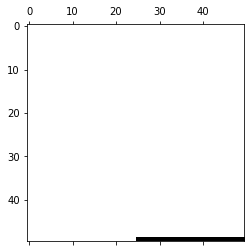

In [31]:
N = 50

t = 1   # 1 year
t = t/ (N-1)  # timestep

S0 = 100
r = 0.01   # annual risk free rate

sigma = 0.4   # 40% annual volatility
u = np.exp(sigma*np.sqrt(t))
d = 1/u
p = (np.exp(r*t)-d)/(u-d)

stock_prices = np.zeros((N,N))                     #csc_matrix((N,N))    # NxN sparse matrix
call_prices = np.zeros((N,N))                      #csc_matrix((N,N))     # NxN sparse call matrix - values not in every call. Many empty
# np.zeros((N,N))--> now dense matrices of -

# initial stock price
stock_prices[0,0] = S0


# computing sparse matrix of future stock prices
for i in range(1,N):
    M = i+1
    stock_prices[i,0] = d* stock_prices[i-1,0]      # backward looking so computes next timestep stock price
                                                    # so sets the tail here, where all prices decrease. This marks lower
                                                    # bound at each timestep from which the other value can be computed at 
                                                    # same timestep == constant i
    for j in range(1,M):
        stock_prices[i,j] = u*stock_prices[i-1, j-1]#this is where the remaining values at given timestep calculated
                                                    # i-1 shifts to prev time step
                                                    # j-1 shifts to price level before price rose

#plt.spy(stock_prices)
                
expiration = stock_prices[-1,:]-K    # stock prices at expiration
print(expiration)
expiration.shape = (expiration.size,)     # puts in vector format, it seems

# replacing all expiration values <= with0
expiration = np.where(expiration >= 0, expiration, 0)   # https://note.nkmk.me/en/python-numpy-where/#:~:text=np.where%20%28%29%20is%20a%20function%20that%20returns%20ndarray,expression%20including%20ndarray%20without%20using%20np.where%20%28%29.%20
print(expiration)
# set call prices in final row of vector
call_prices[-1,:] = expiration

plt.spy(call_prices)


15.28912682401203


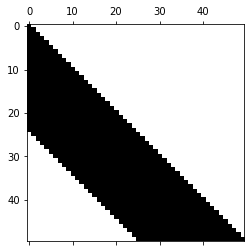

In [32]:
# computing sparse matrix of future stock prices
for i in range(N-2,-1,-1):          # going backwards/ decrementing from penultimate row this time
    for j in range(i+1):
        call_prices[i,j] = np.exp(-r*t)*((1-p)*call_prices[i+1,j] + p*call_prices[i+1, j+1])
        
plt.spy(call_prices)
print(call_prices[0,0])